In [50]:
import pandas as pd

In [51]:
df=pd.read_csv("trip.csv")
df.columns

Index(['User country', 'Nr. reviews', 'Nr. hotel reviews', 'Helpful votes',
       'Score', 'Period of stay', 'Traveler type', 'Swimming Pool',
       'Exercise Room', 'Basketball Court', 'Yoga Classes', 'Club',
       'Free Wifi', 'Hotel name', 'Hotel stars', 'Nr. rooms', 'User continent',
       'Member years', 'Review month', 'Review weekday'],
      dtype='object')

In [52]:
df.isnull().sum().sum()

0

In [53]:
df.shape

(504, 20)

# Aggregation of the dataset

In [54]:
df['Swimming Pool'] = df['Swimming Pool'].map({'YES': 1, 'NO': 0})
df['Exercise Room'] = df['Exercise Room'].map({'YES': 1, 'NO': 0})
df['Basketball Court'] = df['Basketball Court'].map({'YES': 1, 'NO': 0})
df['Yoga Classes'] = df['Yoga Classes'].map({'YES': 1, 'NO': 0})
df['Club'] = df['Club'].map({'YES': 1, 'NO': 0})
df['Free Wifi'] = df['Free Wifi'].map({'YES': 1, 'NO': 0})

df['Traveler type'] = df['Traveler type'].map({'Friends':1, 'Business':2, 'Families':3, 'Solo':4, 'Couples':5})

df['User continent']=df['User continent'].map({'North America':1, 'Europe':2, 'Asia':3, 'Oceania':4, 'Africa':5, 'South America':6})

df['Hotel name']=df['Hotel name'].map({'Circus Circus Hotel & Casino Las Vegas':1, 'Excalibur Hotel & Casino':2, 
 'Monte Carlo Resort&Casino':3, 'Treasure Island- TI Hotel & Casino':4,
 'Tropicana Las Vegas - A Double Tree by Hilton Hotel':5, 'Caesars Palace':6,
 'The Cosmopolitan Las Vegas':7, 'The Palazzo Resort Hotel Casino':8,
 'Wynn Las Vegas':9, 'Trump International Hotel Las Vegas':10, 'The Cromwell':11,
 'Encore at wynn Las Vegas':12, 'Hilton Grand Vacations on the Boulevard':13,
 "Marriott's Grand Chateau":14, 'Tuscany Las Vegas Suites & Casino':15,
 'Hilton Grand Vacations at the Flamingo':16, 'Wyndham Grand Desert':17,
 'The Venetian Las Vegas Hotel':18, 'Bellagio Las Vegas':19, 'Paris Las Vegas':20,
 'The Westin las Vegas Hotel Casino & Spa':21})

df['Review month']=df['Review month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
       'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

df['Review weekday']=df['Review weekday'].map({'Sunday':1, 'Monday':2, 'Tuesday':3, 'Wednesday':4, 'Thursday':5, 'Friday':6, 'Saturday':7})

del(df['User country'])
del(df['Period of stay'])


In [66]:
y=df.iloc[:, 3:4]
x1=df.iloc[:, 0:3]
x2=df.iloc[:, 4:18]
# x=pd.concat([x1, x2], axis=1, ignore_index=True)
# x.columns=['Nr. reviews', 'Nr. hotel reviews', 'Helpful votes', 'Traveler type', 'Swimming Pool', 'Exercise Room', 'Basketball Court', 'Yoga Classes', 'Club', 'Free Wifi', 'Hotel name', 'Hotel stars',
#        'Nr. rooms', 'User continent', 'Member years', 'Review month', 'Review weekday']


new=[]
for i in range(0, x2.shape[0]):
    if(x2['Hotel stars'][i]=='3'): 
        new.append(3)
    elif(x2['Hotel stars'][i]=='5'):
        new.append(5)
    elif(x2['Hotel stars'][i]=='4,5'):
        new.append(4)
    elif(x2['Hotel stars'][i]=='3,5'):
        new.append(3)
    elif(x2['Hotel stars'][i]=='4'):
        new.append(4)

        
star=pd.DataFrame(new)

print(star[0].unique())
x=pd.concat([x1, x2, star], axis=1, ignore_index=True)
x.columns=['Nr. reviews', 'Nr. hotel reviews', 'Helpful votes', 'Traveler type', 'Swimming Pool', 'Exercise Room', 'Basketball Court', 'Yoga Classes', 'Club', 'Free Wifi', 'Hotel name','Hotel stars',
       'Nr. rooms', 'User continent', 'Member years', 'Review month', 'Review weekday', 'Star']
x.head()
del(x['Hotel stars'])

[3 4 5]


In [6]:
y.head()

Score
0      5
1      3
2      5
3      4
4      4

# Applying the Algorithm to find solution

In [67]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y)

In [69]:
x.head()
# print(x['Hotel stars'].unique())
# x.dtypes

Nr. reviews  Nr. hotel reviews  Helpful votes  Traveler type  \
0           11                  4             13              1   
1          119                 21             75              2   
2           36                  9             25              3   
3           14                  7             14              1   
4            5                  5              2              4   

   Swimming Pool  Exercise Room  Basketball Court  Yoga Classes  Club  \
0              0              1                 0             0     1   
1              0              1                 0             0     1   
2              0              1                 0             0     1   
3              0              1                 0             0     1   
4              0              1                 0             0     1   

   Free Wifi  Hotel name  Nr. rooms  User continent  Member years  \
0          1           1       3773               1             9   
1          1           1       3773               1             3   
2          1           1       3773               1             2   
3          1           1       3773               2             6   
4          1           1       3773               1             7   

   Review month  Review weekday  Star  
0             1               5     3  
1             1               6     3  
2             2               7     3  
3             2               6     3  
4             3               3     3

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array w

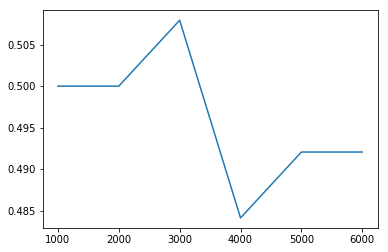

In [97]:
x_axis1=[]
y_axis1=[]

for j in range(1000, 7000, 1000):
    clf=RandomForestClassifier(n_estimators=j,verbose = 1,n_jobs=-1,oob_score=True,random_state=0,warm_start=True)
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
    x_axis1.append(j)
    from sklearn.metrics import accuracy_score
    y_axis1.append(accuracy_score(y_pred, y_test))
    
import matplotlib.pyplot as plt
plt.plot(x_axis1, y_axis1)
plt.show()

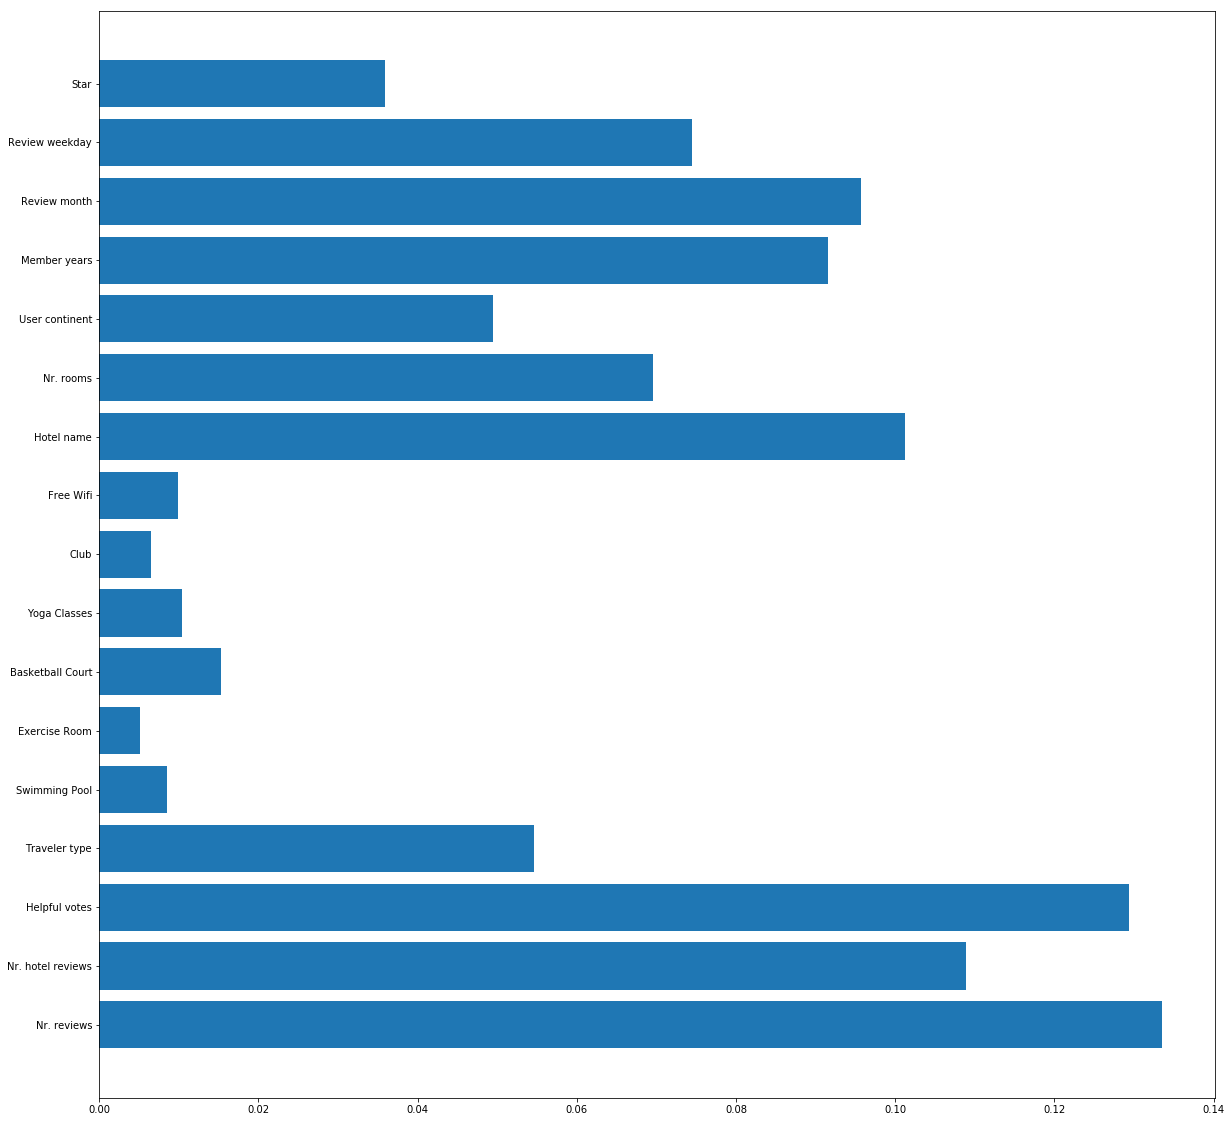

In [110]:
plt.figure(figsize=(20,20))
plt.barh(x_train.columns.values, clf.feature_importances_)
plt.show()